# <font color='blue'><center>Carbon Footprints</center></font>

### 1. Import data

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data set
carbon = pd.read_csv('NFA2019.csv')
carbon.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,0.199546,0.097188051,0.036888,0.029320,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,687000.000000,334600,127000.000000,100943.000800,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,0.135261,0.084003213,0.013742,0.033398,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,465677.972200,289207.1078,47311.551720,114982.279300,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,0.189462,1.26E-06,0.004165,0.033398,1.114093e+00,1.728629e+00,3A
5,Armenia,1992,1,EFConsTotGHA,1.334124e+06,652282.314700,4.328086713,14338.728980,114982.279300,3.835610e+06,5.951342e+06,3A
6,Armenia,1992,1,EFProdPerCap,1.598044e-01,0.135261,0,0.001266,0.033398,1.074631e+00,1.404360e+00,3A
7,Armenia,1992,1,EFProdTotGHA,5.501762e+05,465677.972200,0,4358.142036,114982.279300,3.699750e+06,4.834944e+06,3A
8,Armenia,1993,1,AreaPerCap,1.465909e-01,0.204573,0.099432069,0.037763,0.029320,0.000000e+00,5.176788e-01,3A
9,Armenia,1993,1,AreaTotHA,4.930000e+05,688000.000000,334400,127000.000000,98605.697630,0.000000e+00,1.741006e+06,3A


Glossary:
- **biological capacity available per person (or per capita)**: There were ~ 12.2 billion hectares of biologically productive land and water on Earth in 2019. Dividing by the number of people alive in that year (7.7 billion) gives 1.6 global hectares per person. This area also needs to accommodate the wild specieds that compete for the same biological material and spaces as humans

- **Biocapacity** calculated by multiplying the actyual physical area by the yield factor and the appropriate equivalence factor. Expressed in global hectares

- Consumption Land use matrix: used to total each land division by summing food, shelter, mobility, goods, services of consumptions

- **global hectare**: a biologically productive hectare with world average biological productivity for a given year. Needed because different land types have different productivies (ex: crop land vs pasture land). Values can change yearly as world productivity varies slightly from year to year

- **hectare**: 1/100 of a km^2; 10,000 sq meters, or 2.471 acres

Record:
1. **AreaPerCap**: Total land area in country divided by population
2. **AreaTotHA** : Total land area in country
3. **BiocapPerCap**: Bio capacity in global hectares (gha) divided by population
4. **BiocapTotGHA**: Total biocapacity in global hectares
5. **EFConsPerCap**: Ecological Footprint of consumption in global hectares divided by population
6. **EFConsTotGHA**: Total Ecological Footprint of Consumption in global hectares (gha)
7. **EFProdPerCap**: Ecological Footprint of production in global hectares divided by population
8. **EFProdTotGHA**: Total Ecological Footprint of Production in global hectares (gha)

In [3]:
carbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 12 columns):
country           72186 non-null object
year              72186 non-null int64
country_code      72186 non-null int64
record            72186 non-null object
crop_land         51714 non-null float64
grazing_land      51714 non-null float64
forest_land       51714 non-null object
fishing_ground    51713 non-null float64
built_up_land     51713 non-null float64
carbon            51713 non-null float64
total             72177 non-null float64
QScore            72185 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 6.6+ MB


Looking at the values above, the column 'forest_land' is classified as an object category. After some investigation, it was discovered that row 43084 had a value of "3A". As this is clearly an incorrect value and the other land values for that row were also missing, the value was simply changed to a numeric zero to allow for the column to be converted to a numeric category. This change in category was essential as each land type needed to be a numeric in order for the pivot table to capture all data. 

In [4]:
# Reset value of row 43084 to 0 (from 3A)
carbon.loc[43084, 'forest_land'] = 0

In [5]:
# Convert 'forest_land' column to numeric column for tidying
carbon['forest_land'] = pd.to_numeric(carbon['forest_land'])

## <font color='blue'><center>Hypothesis:</center></font> 

$H_0$:  There is not a relationship between foot prints of land types and carbon footprints of a country

$H_a$: There is a relationship between foot prints of land types and the carbon footprint of a country

### 2. Data Tidying

The first step in cleaning up the data was to put all values for one observation into one row. To do this, the 'record' categories were rearranged through the use of a pivot table. 

In [6]:
# Pivot 'Record Column'
table = pd.pivot_table(carbon, index=['country', 'year', 'country_code'], columns='record', values=['crop_land','forest_land', 'grazing_land', 'fishing_ground', 'built_up_land', 'carbon', 'total'])
table.head()

built_up_land                            \
record                           AreaPerCap    AreaTotHA BiocapPerCap   
country     year country_code                                           
Afghanistan 1961 2                 0.044939  411947.9980     0.029553   
            1962 2                 0.044939  419997.0093     0.028320   
            1963 2                 0.044939  428450.0122     0.026538   
            1964 2                 0.044939  437321.0144     0.027817   
            1965 2                 0.044939  446626.0071     0.028863   

                                                                      \
record                        BiocapTotGHA EFConsPerCap EFConsTotGHA   
country     year country_code                                          
Afghanistan 1961 2             270905.1018     0.029553  270905.1018   
            1962 2             264670.5761     0.028320  264670.5761   
            1963 2             253013.3323     0.026538  253013.3323   
            1964 2             270692.6935     0.027817  270692.6935   
            1965 2             286849.9286     0.028863  286849.9286   

                                                            carbon            \
record                        EFProdPerCap EFProdTotGHA AreaPerCap AreaTotHA   
country     year country_code                                                  
Afghanistan 1961 2                0.029553  270905.1018        0.0       0.0   
            1962 2                0.028320  264670.5761        0.0       0.0   
            1963 2                0.026538  253013.3323        0.0       0.0   
            1964 2                0.027817  270692.6935        0.0       0.0   
            1965 2                0.028863  286849.9286        0.0       0.0   

                               ... grazing_land                   total  \
record                         ... EFProdPerCap EFProdTotGHA AreaPerCap   
country     year country_code  ...                                        
Afghanistan 1961 2             ...     0.580407  5320453.660   4.312647   
            1962 2             ...     0.555837  5194780.674   4.237278   
            1963 2             ...     0.590868  5633301.953   4.159819   
            1964 2             ...     0.582520  5668714.254   4.082818   
            1965 2             ...     0.586829  5832149.121   3.998897   

                                                                      \
record                           AreaTotHA BiocapPerCap BiocapTotGHA   
country     year country_code                                          
Afghanistan 1961 2             39533000.63     1.331042  12201342.58   
            1962 2             39601049.64     1.284773  12007318.79   
            1963 2             39659502.64     1.226776  11696022.13   
            1964 2             39731373.65     1.229172  11961514.15   
            1965 2             39742678.64     1.221619  12140946.09   

                                                                      \
record                        EFConsPerCap EFConsTotGHA EFProdPerCap   
country     year country_code                                          
Afghanistan 1961 2                1.219593  11179719.65     1.266332   
            1962 2                1.169910  10933828.09     1.217741   
            1963 2                1.200681  11447234.57     1.213243   
            1964 2                1.226976  11940144.48     1.234477   
            1965 2                1.264391  12566034.66     1.255980   

                                            
record                        EFProdTotGHA  
country     year country_code               
Afghanistan 1961 2             11608157.58  
            1962 2             11380847.90  
            1963 2             11566996.86  
            1964 2             12013141.13  
            1965 2             12482447.16  

[5 rows x 56 columns]

In [7]:
# Join levels of columns 
df = pd.DataFrame(table)
df.columns = ['-'.join(col) for col in df.columns]
df.head()

built_up_land-AreaPerCap  \
country     year country_code                             
Afghanistan 1961 2                             0.044939   
            1962 2                             0.044939   
            1963 2                             0.044939   
            1964 2                             0.044939   
            1965 2                             0.044939   

                               built_up_land-AreaTotHA  \
country     year country_code                            
Afghanistan 1961 2                         411947.9980   
            1962 2                         419997.0093   
            1963 2                         428450.0122   
            1964 2                         437321.0144   
            1965 2                         446626.0071   

                               built_up_land-BiocapPerCap  \
country     year country_code                               
Afghanistan 1961 2                               0.029553   
            1962 2                               0.028320   
            1963 2                               0.026538   
            1964 2                               0.027817   
            1965 2                               0.028863   

                               built_up_land-BiocapTotGHA  \
country     year country_code                               
Afghanistan 1961 2                            270905.1018   
            1962 2                            264670.5761   
            1963 2                            253013.3323   
            1964 2                            270692.6935   
            1965 2                            286849.9286   

                               built_up_land-EFConsPerCap  \
country     year country_code                               
Afghanistan 1961 2                               0.029553   
            1962 2                               0.028320   
            1963 2                               0.026538   
            1964 2                               0.027817   
            1965 2                               0.028863   

                               built_up_land-EFConsTotGHA  \
country     year country_code                               
Afghanistan 1961 2                            270905.1018   
            1962 2                            264670.5761   
            1963 2                            253013.3323   
            1964 2                            270692.6935   
            1965 2                            286849.9286   

                               built_up_land-EFProdPerCap  \
country     year country_code                               
Afghanistan 1961 2                               0.029553   
            1962 2                               0.028320   
            1963 2                               0.026538   
            1964 2                               0.027817   
            1965 2                               0.028863   

                               built_up_land-EFProdTotGHA  carbon-AreaPerCap  \
country     year country_code                                                  
Afghanistan 1961 2                            270905.1018                0.0   
            1962 2                            264670.5761                0.0   
            1963 2                            253013.3323                0.0   
            1964 2                            270692.6935                0.0   
            1965 2                            286849.9286                0.0   

                               carbon-AreaTotHA  ...  \
country     year country_code                    ...   
Afghanistan 1961 2                          0.0  ...   
            1962 2                          0.0  ...   
            1963 2                          0.0  ...   
            1964 2                          0.0  ...   
            1965 2                          0.0  ...   

                               grazing_land-EFProdPerCap  \
country     year country_code                           

In [8]:
# Reset index
df = df.reset_index()
df.head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,grazing_land-EFProdPerCap,grazing_land-EFProdTotGHA,total-AreaPerCap,total-AreaTotHA,total-BiocapPerCap,total-BiocapTotGHA,total-EFConsPerCap,total-EFConsTotGHA,total-EFProdPerCap,total-EFProdTotGHA
0,Afghanistan,1961,2,0.044939,411947.9980,0.029553,270905.1018,0.029553,270905.1018,0.029553,...,0.580407,5320453.660,4.312647,39533000.63,1.331042,12201342.58,1.219593,11179719.65,1.266332,11608157.58
1,Afghanistan,1962,2,0.044939,419997.0093,0.028320,264670.5761,0.028320,264670.5761,0.028320,...,0.555837,5194780.674,4.237278,39601049.64,1.284773,12007318.79,1.169910,10933828.09,1.217741,11380847.90
2,Afghanistan,1963,2,0.044939,428450.0122,0.026538,253013.3323,0.026538,253013.3323,0.026538,...,0.590868,5633301.953,4.159819,39659502.64,1.226776,11696022.13,1.200681,11447234.57,1.213243,11566996.86
3,Afghanistan,1964,2,0.044939,437321.0144,0.027817,270692.6935,0.027817,270692.6935,0.027817,...,0.582520,5668714.254,4.082818,39731373.65,1.229172,11961514.15,1.226976,11940144.48,1.234477,12013141.13
4,Afghanistan,1965,2,0.044939,446626.0071,0.028863,286849.9286,0.028863,286849.9286,0.028863,...,0.586829,5832149.121,3.998897,39742678.64,1.221619,12140946.09,1.264391,12566034.66,1.255980,12482447.16


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 59 columns):
country                        9024 non-null object
year                           9024 non-null int64
country_code                   9024 non-null int64
built_up_land-AreaPerCap       6463 non-null float64
built_up_land-AreaTotHA        6465 non-null float64
built_up_land-BiocapPerCap     6463 non-null float64
built_up_land-BiocapTotGHA     6466 non-null float64
built_up_land-EFConsPerCap     6463 non-null float64
built_up_land-EFConsTotGHA     6465 non-null float64
built_up_land-EFProdPerCap     6463 non-null float64
built_up_land-EFProdTotGHA     6465 non-null float64
carbon-AreaPerCap              6463 non-null float64
carbon-AreaTotHA               6465 non-null float64
carbon-BiocapPerCap            6463 non-null float64
carbon-BiocapTotGHA            6466 non-null float64
carbon-EFConsPerCap            6463 non-null float64
carbon-EFConsTotGHA            6465 non-null float

### 3. Missing Values

After the table was reformatted, the data was analyzed for null values. As seen above in the information print out, about 2500 null values appear within the land type categories. Looking at some of the null values, such as the values under Yugoslavia below, revealed that the null values all stem from countries that either did not exist during given years (due to wars, boundary changes, imperial control of other countries, etc.) or from countries that did not keep data during the year in question. 

After analyzing these null values, the decision was made to remove the null values as there is no way to obtain the missing data for these observations. 

In [10]:
# Identify null values
carbon2 = df[(df['year'] == 1961)]
carbon2.tail()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,grazing_land-EFProdPerCap,grazing_land-EFProdTotGHA,total-AreaPerCap,total-AreaTotHA,total-BiocapPerCap,total-BiocapTotGHA,total-EFConsPerCap,total-EFConsTotGHA,total-EFProdPerCap,total-EFProdTotGHA
8716,Viet Nam,1961,237,0.020826,7.011330e+05,0.032184,1.083546e+06,0.032184,1.083546e+06,0.032184,...,0.012225,4.115694e+05,1.910235,6.431150e+07,1.224648,4.122999e+07,0.641881,2.161009e+07,0.625990,2.107508e+07
8772,World,1961,5001,0.025300,7.818440e+07,0.026488,8.185577e+07,0.026488,8.185577e+07,0.026488,...,0.264126,8.162302e+08,3.766015,1.163815e+10,3.115864,9.628986e+09,2.281758,7.051328e+09,2.281758,7.051328e+09
8828,Yemen,1961,249,0.028140,1.480320e+05,0.028779,1.513900e+05,0.028779,1.513900e+05,0.028779,...,0.480254,2.526375e+06,5.798232,3.050160e+07,2.257762,1.187696e+07,0.953409,5.015407e+06,0.902172,4.745875e+06
8884,Yugoslav SFR,1961,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.520105,2.846670e+07,2.029870,3.801297e+07,2.191072,4.103176e+07,2.140837,4.009103e+07
8968,Zimbabwe,1961,181,0.041973,1.624660e+05,0.031254,1.209755e+05,0.031254,1.209755e+05,0.031254,...,0.735809,2.848142e+06,9.037836,3.498329e+07,2.036738,7.883723e+06,1.810497,7.007999e+06,1.858818,7.195039e+06


In [11]:
# Drop all rows with null values
df = df.dropna()

In [12]:
# Check for any other NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6462 entries, 0 to 9023
Data columns (total 59 columns):
country                        6462 non-null object
year                           6462 non-null int64
country_code                   6462 non-null int64
built_up_land-AreaPerCap       6462 non-null float64
built_up_land-AreaTotHA        6462 non-null float64
built_up_land-BiocapPerCap     6462 non-null float64
built_up_land-BiocapTotGHA     6462 non-null float64
built_up_land-EFConsPerCap     6462 non-null float64
built_up_land-EFConsTotGHA     6462 non-null float64
built_up_land-EFProdPerCap     6462 non-null float64
built_up_land-EFProdTotGHA     6462 non-null float64
carbon-AreaPerCap              6462 non-null float64
carbon-AreaTotHA               6462 non-null float64
carbon-BiocapPerCap            6462 non-null float64
carbon-BiocapTotGHA            6462 non-null float64
carbon-EFConsPerCap            6462 non-null float64
carbon-EFConsTotGHA            6462 non-null float

### 4. Data Transformation

In [13]:
# Create population column
df['population'] = df['built_up_land-BiocapTotGHA'] / df['built_up_land-BiocapPerCap']

In [14]:
# Create columns for cumulative totals for each sub-footprint
df['total-EF'] = df['total-BiocapTotGHA'] + df['total-EFConsTotGHA'] + df['total-EFProdTotGHA']
df['total-crop_land'] = df['crop_land-BiocapTotGHA'] + df['crop_land-EFConsTotGHA'] + df['crop_land-EFProdTotGHA']
df['total-grazing_land'] = df['grazing_land-BiocapTotGHA'] + df['grazing_land-EFConsTotGHA'] + df['grazing_land-EFProdTotGHA']
df['total-forest_land'] = df['forest_land-BiocapTotGHA'] + df['forest_land-EFConsTotGHA'] + df['forest_land-EFProdTotGHA']
df['total-fishing_ground'] = df['fishing_ground-BiocapTotGHA'] + df['fishing_ground-EFConsTotGHA'] + df['fishing_ground-EFProdTotGHA']
df['total-built_up_land'] = df['built_up_land-BiocapTotGHA'] + df['built_up_land-EFConsTotGHA'] + df['built_up_land-EFProdTotGHA']
df['total-carbon'] = df['carbon-BiocapTotGHA'] + df['carbon-EFConsTotGHA'] + df['carbon-EFProdTotGHA']

In [15]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df.head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-EFProdPerCap,total-EFProdTotGHA,population,total-EF,total-crop_land,total-grazing_land,total-forest_land,total-fishing_ground,total-built_up_land,total-carbon
0,Afghanistan,1961,2,0.0449,411947.9980,0.0296,270905.1018,0.0296,270905.1018,0.0296,...,1.2663,11608157.5800,9166759.6680,34989219.8100,15146597.5840,16372902.3960,2232425.0174,969.2636,812715.3054,423610.2433
1,Afghanistan,1962,2,0.0449,419997.0093,0.0283,264670.5761,0.0283,264670.5761,0.0283,...,1.2177,11380847.9000,9345870.1775,34321994.7800,14589959.2720,16119895.1480,2253617.6561,966.9715,794011.7283,563544.0002
2,Afghanistan,1963,2,0.0449,428450.0122,0.0265,253013.3323,0.0265,253013.3323,0.0265,...,1.2132,11566996.8600,9533950.1449,34710253.5600,13826930.5170,17200656.3680,2309416.6936,963.7433,759039.9969,613246.2482
3,Afghanistan,1964,2,0.0449,437321.0144,0.0278,270692.6935,0.0278,270692.6935,0.0278,...,1.2345,12013141.1300,9731360.2393,35914799.7600,14653720.9570,17233757.5900,2479332.6245,961.5439,812078.0805,734948.9609
4,Afghanistan,1965,2,0.0449,446626.0071,0.0289,286849.9286,0.0289,286849.9286,0.0289,...,1.2560,12482447.1600,9938410.2032,37189427.9100,15237732.4720,17665081.7940,2569118.0709,958.2054,860549.7858,855987.5845


In [16]:
# Create per capita columns
df['total-carbon_perCap'] = df['total-carbon'] / df['population']
df['total-EF_perCap'] = df['total-EF'] / df['population']
df['total-crop_land_perCap'] = df['total-crop_land'] / df['population']
df['total-grazing_land_perCap'] = df['total-grazing_land'] / df['population']
df['total-forest_land_perCap'] = df['total-forest_land'] / df['population']
df['total-fishing_ground_perCap'] = df['total-fishing_ground'] / df['population']
df['total-built_up_land_perCap'] = df['total-built_up_land'] / df['population']

In [17]:
df.head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
0,Afghanistan,1961,2,0.0449,411947.9980,0.0296,270905.1018,0.0296,270905.1018,0.0296,...,969.2636,812715.3054,423610.2433,0.0462,3.8170,1.6523,1.7861,0.2435,0.0001,0.0887
1,Afghanistan,1962,2,0.0449,419997.0093,0.0283,264670.5761,0.0283,264670.5761,0.0283,...,966.9715,794011.7283,563544.0002,0.0603,3.6724,1.5611,1.7248,0.2411,0.0001,0.0850
2,Afghanistan,1963,2,0.0449,428450.0122,0.0265,253013.3323,0.0265,253013.3323,0.0265,...,963.7433,759039.9969,613246.2482,0.0643,3.6407,1.4503,1.8041,0.2422,0.0001,0.0796
3,Afghanistan,1964,2,0.0449,437321.0144,0.0278,270692.6935,0.0278,270692.6935,0.0278,...,961.5439,812078.0805,734948.9609,0.0755,3.6906,1.5058,1.7710,0.2548,0.0001,0.0834
4,Afghanistan,1965,2,0.0449,446626.0071,0.0289,286849.9286,0.0289,286849.9286,0.0289,...,958.2054,860549.7858,855987.5845,0.0861,3.7420,1.5332,1.7775,0.2585,0.0001,0.0866


In [18]:
df.describe()

,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,built_up_land-EFProdTotGHA,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
count,6462.0000,6462.0000,6462.0000,6462.0000,6462.0000,6462.0000,6462.0000,6462.0000,6462.0000,6462.0000,...,6462.0000,6462.0000,6462.0000,6425.0000,6425.0000,6425.0000,6425.0000,6425.0000,6425.0000,6425.0000
mean,1990.5141,170.0371,0.0337,2179655.7463,0.0520,4567735.6473,0.0520,4567735.6473,0.0520,4567735.6473,...,34554980.7972,13703206.9419,245887802.2825,2.8669,10.2823,1.4875,1.3511,3.4972,0.9225,0.1570
std,16.0539,458.4088,0.0147,12836921.3039,0.0371,27056559.2303,0.0371,27056559.2303,0.0371,27056559.2303,...,197308711.9947,81169677.6908,1581895565.2823,4.1330,11.7276,1.0469,2.2234,8.8183,1.9735,0.1110
min,1961.0000,1.0000,0.0003,115.8520,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,957.8949,0.0000,10575.9180,0.0111,1.2008,0.1674,0.0019,0.0319,0.0001,0.0017
25%,1977.0000,56.0000,0.0249,115840.9996,0.0282,118979.6453,0.0282,118979.6453,0.0282,118979.6453,...,573094.1860,356938.9358,1453006.1076,0.2148,3.8896,0.8619,0.3058,0.5557,0.0985,0.0850
50%,1992.0000,124.0000,0.0309,326583.9997,0.0427,419926.6911,0.0427,419926.6911,0.0427,419926.6911,...,3415538.7785,1259780.0732,8351208.1040,1.0949,6.7494,1.1614,0.5945,1.3075,0.3146,0.1289
75%,2004.0000,197.0000,0.0410,853754.7607,0.0630,1380970.7512,0.0630,1380970.7512,0.0630,1380970.7512,...,12499727.2210,4142912.2537,52634745.2425,4.2138,11.6683,1.7496,1.4746,2.6567,0.7064,0.1895
max,2016.0000,5001.0000,0.1308,188913000.0000,0.2983,472616344.3000,0.2983,472616344.3000,0.2983,472616344.3000,...,2448129451.8000,1417849032.9000,25143207762.0000,39.4568,106.8129,7.8565,24.8040,94.4464,18.4759,0.8950


### 5. Exploratory Data Analysis

In order to get a better idea of the data, the most recent year of data (2016) was separated and analyzed first. The purpose of separating this data is to identify potential outliers that might skew the data. 

In [19]:
df2016 = df[df['year'] == 2016]
df2016.head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
55,Afghanistan,2016,2,0.0449,1557420.0440,0.0392,1356853.5270,0.0392,1356853.5270,0.0392,...,8091.9794,4070560.5810,8585153.3170,0.2477,1.7194,0.7012,0.5179,0.1349,0.0002,0.1175
111,Albania,2016,3,0.0250,73269.5721,0.0391,114562.7909,0.0391,114562.7909,0.0391,...,381035.8507,343688.3727,4063912.8600,1.3887,4.4143,1.3766,0.6703,0.7310,0.1302,0.1174
167,Algeria,2016,4,0.0300,1217520.0200,0.0292,1187523.7510,0.0292,1187523.7510,0.0292,...,1230570.2013,3562571.2530,103518590.7700,2.5493,4.5409,1.0324,0.5679,0.2732,0.0303,0.0877
223,Angola,2016,7,0.0372,1070810.0590,0.0464,1337520.8570,0.0464,1337520.8570,0.0464,...,11142686.7980,4012562.5710,17496905.7190,0.6072,3.7299,0.7673,1.1970,0.6325,0.3867,0.1393
316,Argentina,2016,9,0.0338,1481400.0240,0.1153,5056433.7860,0.1153,5056433.7860,0.1153,...,81130856.5000,15169301.3580,121340897.6100,2.7673,15.9680,6.5059,3.4280,1.0705,1.8503,0.3460


The first method used to identify potential outliers is a boxplot, seen below. 

Text(0.5, 1.08, '2016 Outliers for Carbon, Population, Built Land, and Ecological Footprint')

<Figure size 432x288 with 0 Axes>

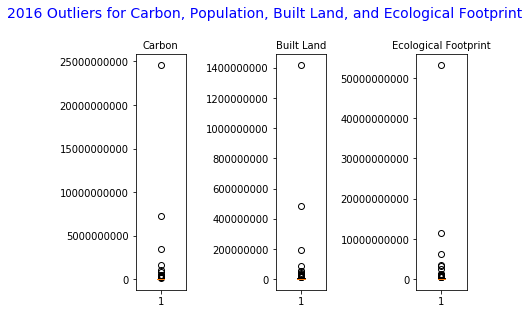

In [20]:
#Search for outliers and trends

fig = plt.figure()
fig, ax = plt.subplots(1, 3)

plt.subplot(1, 3, 1)
plt.boxplot(df2016['total-carbon'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Carbon', fontsize=10)

plt.subplot(1, 3, 2)
plt.boxplot(df2016['total-built_up_land'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Built Land', fontsize=10)

plt.subplot(1, 3, 3)
plt.boxplot(df2016['total-EF']) 
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Ecological Footprint', fontsize=10)

plt.tight_layout()

fig.suptitle('2016 Outliers for Carbon, Population, Built Land, and Ecological Footprint', fontsize=14, color='blue', y=1.08)

As can be seen in the boxplot, the majority of data falls far below the extremes, with one extreme outlier for each category and a handful of outliers above the 75 percentile. The data was then analyzed to determine the source of the extreme outlier. 

In [21]:
df2016.describe()

,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,built_up_land-EFProdTotGHA,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
count,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,...,161.0000,161.0000,161.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000
mean,2016.0000,159.7764,0.0351,2371703.7269,0.0686,6252144.0998,0.0686,6252144.0998,0.0686,6252144.0998,...,30419371.9878,18756432.2995,296901243.9324,3.2171,10.1571,1.5617,0.9123,3.4039,0.8550,0.2071
std,0.0000,391.7271,0.0162,15162052.6084,0.0492,39499606.1858,0.0492,39499606.1858,0.0492,39499606.1858,...,194813587.3688,118498818.5574,2032141400.3221,3.7425,12.8689,1.2195,1.7447,10.4053,1.8184,0.1471
min,2016.0000,1.0000,0.0003,120.1840,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,8091.9794,0.0000,204060.8329,0.0485,1.4795,0.1867,0.0054,0.0609,0.0002,0.0017
25%,2016.0000,66.0000,0.0259,141061.9965,0.0386,184729.6388,0.0386,184729.6388,0.0386,184729.6388,...,674666.1664,554188.9164,3490168.8780,0.5015,3.7552,0.7634,0.2523,0.4455,0.0798,0.1158
50%,2016.0000,123.0000,0.0322,407062.9883,0.0573,735535.0349,0.0573,735535.0349,0.0573,735535.0349,...,2833540.5872,2206605.1047,15881320.5120,1.9932,7.1294,1.2113,0.4591,0.8720,0.2435,0.1721
75%,2016.0000,198.0000,0.0423,1070810.0590,0.0817,1935747.6930,0.0817,1935747.6930,0.0817,1935747.6930,...,10225006.7310,5807243.0790,65038037.9400,4.6691,11.7184,1.9031,0.8733,2.3026,0.5811,0.2460
max,2016.0000,5001.0000,0.1308,188913000.0000,0.2955,472616344.3000,0.2955,472616344.3000,0.2955,472616344.3000,...,2435652408.4000,1417849032.9000,24584738438.0000,25.3086,101.0798,6.6588,18.0577,83.4403,14.5661,0.8866


In [22]:
df2016.sort_values(by=['total-carbon', 'total-EF'], ascending=False).head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
8827,World,2016,5001,0.0253,188913000.0000,0.0633,472616344.3000,0.0633,472616344.3000,0.0633,...,2435652408.4000,1417849032.9000,24584738438.0000,3.2925,7.1230,1.6009,0.4819,1.2316,0.3262,0.1899
1783,China,2016,351,0.0221,31691300.7800,0.1119,160538830.6000,0.1119,160538830.6000,0.1119,...,279529185.6100,481616491.8000,7206757941.0000,5.0222,7.9992,1.5532,0.3447,0.5487,0.1948,0.3356
8578,United States of America,2016,231,0.0272,8761080.0780,0.0907,29215883.2200,0.0907,29215883.2200,0.0907,...,179490370.2600,87647649.6600,3497595686.0000,10.8560,19.6979,3.8969,0.8768,3.2389,0.5571,0.2720
3955,India,2016,100,0.0187,24802199.2200,0.0479,63470660.5800,0.0479,63470660.5800,0.0479,...,91735292.7100,190411981.7400,1594351008.6000,1.2040,2.6885,0.9952,0.0150,0.2612,0.0693,0.1438
6804,Russian Federation,2016,185,0.0334,4810729.9800,0.0418,6014960.1840,0.0418,6014960.1840,0.0418,...,239715090.5200,18044880.5520,993780484.1000,6.9029,18.1844,3.0429,0.4600,5.9881,1.6651,0.1253


As we can see in the data above, the extreme outlier is a result of including the world data in the data set. Although this data is important, the inclusion of the world data significantly skews the analytics of the country data, so the world data was removed and imported into its own data set, df_world. This data set will then be analyzed separately from the country data set. 

In [23]:
# Create world data set from original df
df_world = df[df['country'] == 'World']
df_world.head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
8772,World,1961,5001,0.0253,78184398.4400,0.0265,81855773.0100,0.0265,81855773.0100,0.0265,...,1715782379.8000,245567319.0300,6180061704.0000,1.9998,7.6794,1.4026,1.0064,2.6358,0.5552,0.0795
8773,World,1962,5001,0.0253,79675500.0000,0.0275,86757590.8800,0.0275,86757590.8800,0.0275,...,1740069094.4000,260272772.6400,6448189102.0000,2.0475,7.7031,1.4365,0.9921,2.5918,0.5525,0.0826
8774,World,1963,5001,0.0253,81219500.0000,0.0277,88788704.3900,0.0277,88788704.3900,0.0277,...,1755599738.4000,266366113.1700,6902012156.0000,2.1500,7.7322,1.4242,0.9819,2.5462,0.5469,0.0830
8775,World,1964,5001,0.0253,82823500.0000,0.0285,93267467.2700,0.0285,93267467.2700,0.0285,...,1740632062.8000,279802401.8100,7355740214.0000,2.2469,7.7919,1.4423,0.9591,2.5263,0.5317,0.0855
8776,World,1965,5001,0.0253,84491296.8800,0.0288,96299643.1200,0.0288,96299643.1200,0.0288,...,1783551940.4000,288898929.3600,7756342094.0000,2.3225,7.8186,1.4369,0.9523,2.4862,0.5341,0.0865


In [24]:
# Create df_countries without world data
df_countries = df[df.country != 'World']
df_countries.sort_values(by=['total-carbon', 'total-EF'], ascending=False).head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
1780,China,2013,351,0.0221,31227800.7800,0.1190,168220706.7000,0.1190,168220706.7000,0.1190,...,282647212.6200,504662120.1000,7449968913.0000,5.2692,8.2268,1.5041,0.3430,0.5535,0.1999,0.3569
1781,China,2014,351,0.0221,31391599.6100,0.1197,170144028.8000,0.1197,170144028.8000,0.1197,...,291228658.0100,510432086.4000,7354449755.0000,5.1744,8.1438,1.5125,0.3446,0.5482,0.2049,0.3591
1782,China,2015,351,0.0221,31546400.3900,0.1110,158538133.9000,0.1110,158538133.9000,0.1110,...,292559058.7700,475614401.7000,7290253767.0000,5.1039,8.0749,1.5595,0.3425,0.5312,0.2048,0.3330
1783,China,2016,351,0.0221,31691300.7800,0.1119,160538830.6000,0.1119,160538830.6000,0.1119,...,279529185.6100,481616491.8000,7206757941.0000,5.0222,7.9992,1.5532,0.3447,0.5487,0.1948,0.3356
1779,China,2012,351,0.0221,31057699.2200,0.1186,166792579.0000,0.1186,166792579.0000,0.1186,...,279172752.5600,500377737.0000,7187519406.0000,5.1116,8.0475,1.5033,0.3337,0.5445,0.1985,0.3559


### <font color='blue'><center>5a. World data analysis</center></font>

Now separated, the first step in analyzing the world data is to establish what categories are correlated. To do this, total columns for each footprint type were selected and then charted via pairplots. 

In [25]:
df_world2 = df_world[['country', 'year', 'country_code', 'total-carbon', 'total-EF', 'total-built_up_land', 'total-crop_land', 'total-grazing_land', 'total-forest_land', 'total-fishing_ground']]

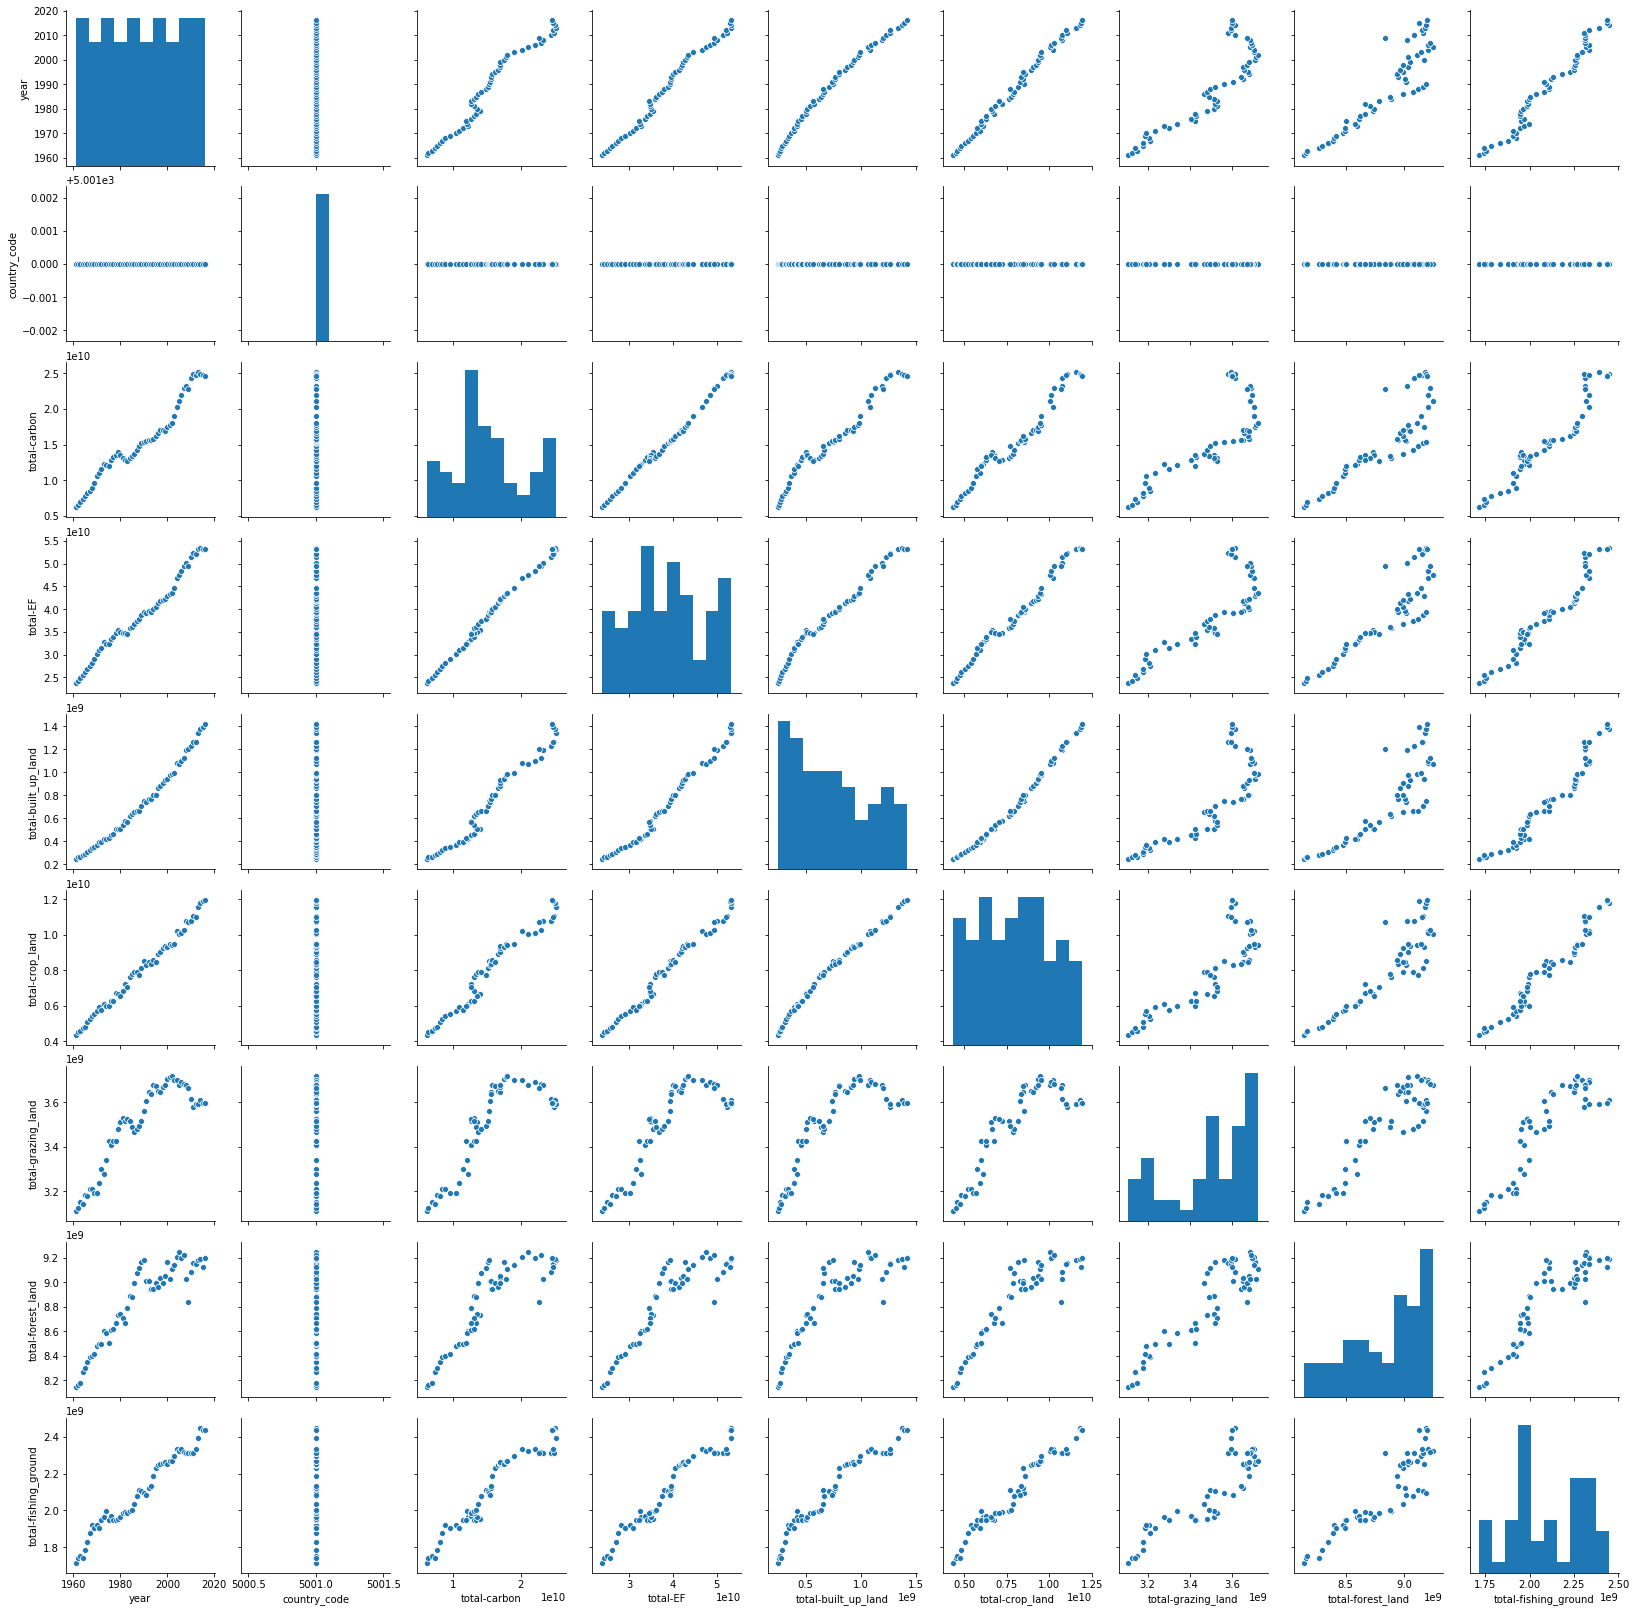

In [26]:
sns.pairplot(df_world2)

As we see in the pairplots above, all of the footprints are highly, positively correlated with each other. This makes sense as the total land area within countries does not change much but the uses for that land can change as consumer needs change. Interestingly, the types of land and total carbon all increased fairly linearly up until the last 20 years or so when the growth patterns started changing. Built up land and grazing land became negatively correlated as did grazing land and the total ecological footprint of a country. 

With the correlations established above, the next step in analyzing the world data was to look at the total carbon footprint of the world by year, as shown in the graph below. 

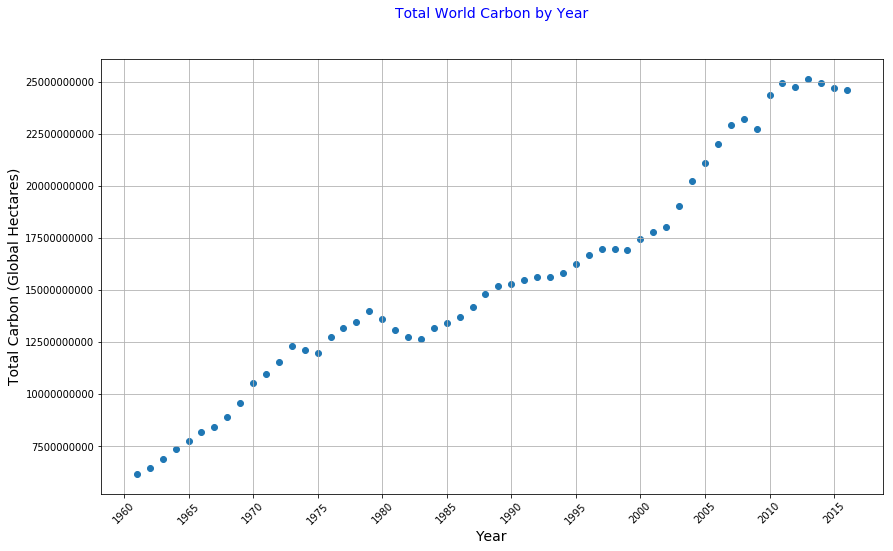

In [27]:
plt.figure(figsize=(14,8))
plt.scatter('year', 'total-carbon', data=df_world)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Year', fontsize=14)
ax.xaxis.set_ticks(np.arange(1960, 2016, 5))
plt.xticks(rotation=45)
plt.ylabel('Total Carbon (Global Hectares)', fontsize=14)
plt.title('Total World Carbon by Year', fontsize=14, color='blue', y=1.08)
plt.grid()
plt.show()

Looking at the total carbon footprint of the world starting in 1961, we see that the carbon foot print steadily increased throughout the 1960s with a brief drop in 1973 and 1979. Although these declines in carbon output may have been a response to the passing of several environmental regulation policies (such as the Clean Air Act in 1970 and the Clean Water Act in 1977 in the United States), there is not enough data in this particular data set to make the conclusion that the decline was directly a result of a change in environmental regulations. 

Since the decline in the early 1980s, the total carbon footprint has continued to rise- sometimes sharply- until 2013. However, we see from the data that the carbon emissions have increased from 6.18 x $10^{9}$ to 2.45 x $10^{10}$ global hectares, an increase of 397.81%. Given this increase and the impact that carbon emissions have on the global temperature, the footprints that were positively correlated with carbon emissions were also analyzed. 

In [28]:
# Set index for stacked bar plots
df_world.set_index('year', inplace=True)
df_world2.set_index('year', inplace=True)

Text(0.5, 0, 'Year')

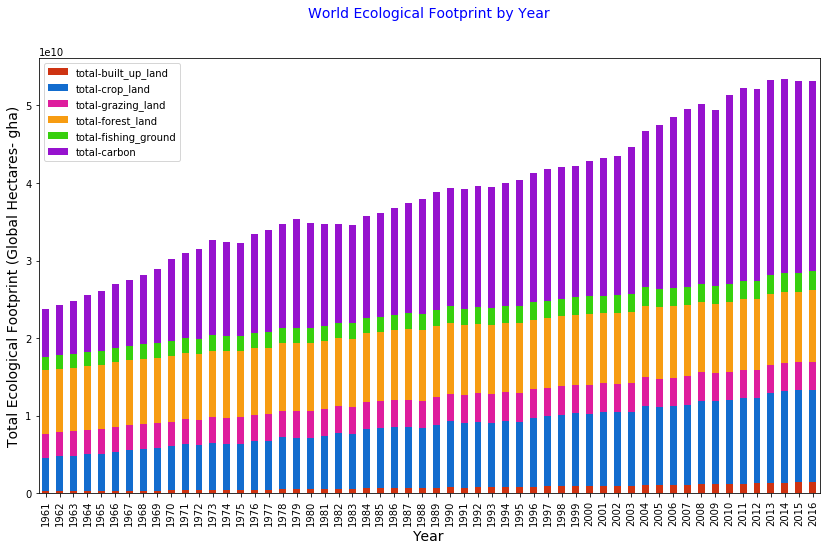

In [29]:
# Create stacked bar chart for total Ecological Footprint
colors = ["#CE3312","#126CCE", "#DE1D9D", "#F79C12", "#37CF0D", "#9612CE"]
df_world2.loc[:, ['total-built_up_land',  'total-crop_land', 'total-grazing_land', 'total-forest_land', 'total-fishing_ground', 'total-carbon']].plot.bar(stacked=True, color=colors, figsize=(14,8))
plt.title('World Ecological Footprint by Year', fontsize=14, color='blue', y=1.08)
plt.ylabel('Total Ecological Footprint (Global Hectares- gha)', fontsize=14)
plt.xlabel('Year', fontsize=14)

The first footprint that was looked at was the total ecological footprint. The total ecological footprint is a summative total of all other footprint types that a country has: carbon, built up land, grazing land, crop land, forest land, and fishing ground. The footprint for each of these categories is determined in part by the amount of area devoted to each type of land, the amount of that type of land used for production of goods, the amount of that type of land being consumed, and the biocapacity of that land type. 

In the chart above, we see that the total built up land (in red) has steadily but slowly increased while the total crop land has more than doubled in footprint size, which makes sense as the increasing world population needs increasing amounts of food. The total grazing land has remained approximately the same, with just slight increases as has the total forest land footprint and the total fishing ground footprint. Based on this, we can infer that the increase in carbon may be correlated with the increase in the crop land footprint and the built up land footprint. 

To get a better idea of what each land type footprint was composed of, each land type footprint was next charted, broken down by land area, biocapacity, consumption, and production totals. 

Text(0.5, 0, 'Year')

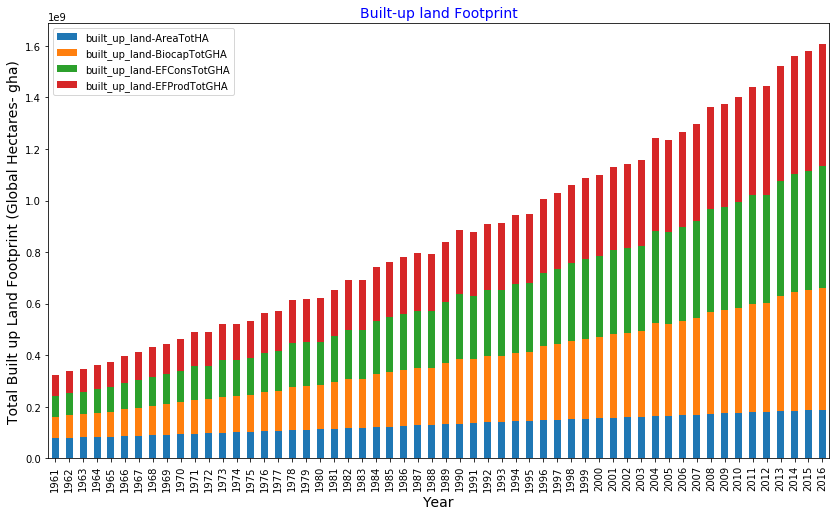

In [30]:
# Stacked bar chart of total built up land by year
built_world = df_world.loc[:,['built_up_land-AreaTotHA', 'built_up_land-BiocapTotGHA', 'built_up_land-EFConsTotGHA', 'built_up_land-EFProdTotGHA']].plot.bar(stacked=True, figsize=(14,8))
plt.title('Built-up land Footprint', fontsize=14, color='blue')   
plt.ylabel('Total Built up Land Footprint (Global Hectares- gha)', fontsize=14)
plt.xlabel('Year', fontsize=14)

Looking at the built up land footprint, we see that all categories have increased dramatically since 1961. Biocapacity footprint, in orange, is a reflection of the number of organisms that the land area in this category has to sustain; this includes not just increases in human population but all species of living things from plants to animals to bacteria. The increase in human population during this time would be enough to significantly raise the biocapacity footprint on its own but an increase in humans also usually means an increase in pets, bacteria, and organisms like molds. 

The built up land consumption footprint (green) and the built up land production footprint (red) both have increased exponentially in size since 1961. This too can be linked to population growth as a larger population requires more housing and businesses be built for the world market. Production and consumption roughly mirror each other in value due to supply/demand on a global scale. 

Text(0.5, 0, 'Year')

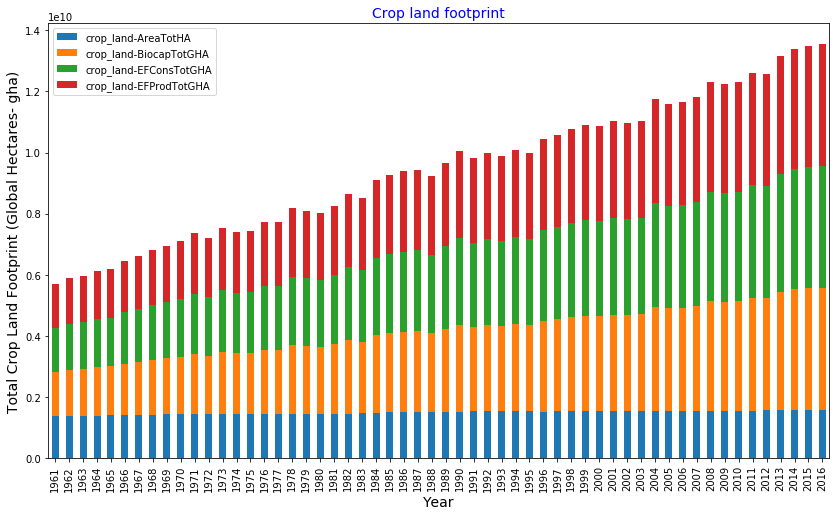

In [31]:
# Stacked bar chart of Crop land footprint by year
df_world.loc[:,['crop_land-AreaTotHA', 'crop_land-BiocapTotGHA', 'crop_land-EFConsTotGHA', 'crop_land-EFProdTotGHA']].plot.bar(stacked=True, figsize=(14,8))
plt.title('Crop land footprint', fontsize=14, color='blue') 
plt.ylabel('Total Crop Land Footprint (Global Hectares- gha)', fontsize=14)
plt.xlabel('Year', fontsize=14)

Looking at the crop land footprint reveals a slightly different pattern than the built up land. For the crop land footprint, we see tha the total area of crop land has stayed approximately the same since 1961. However, the biocapacity has increased substantially as has production/consumption from that same land. There are a few things that could account for this including increased use of genetically modified crops, more efficient farming and harvesting techniques and practices, and vertical farming (such as through the use of hydroponics). 

Text(0.5, 0, 'Year')

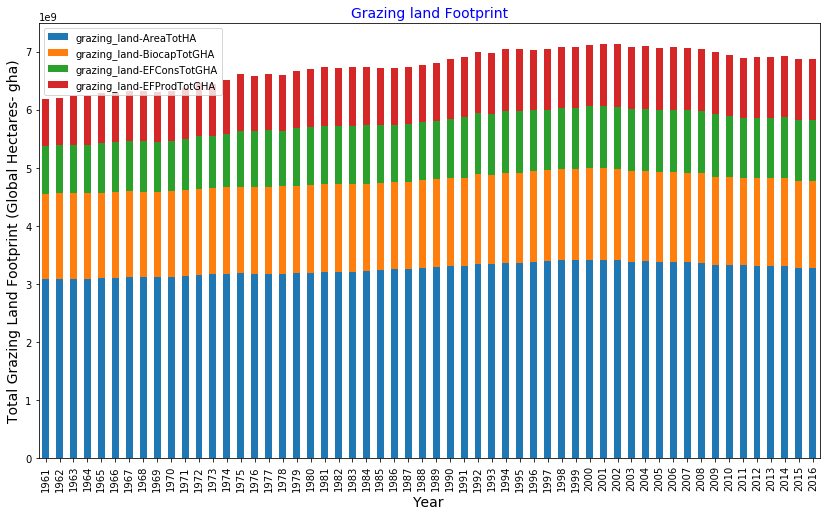

In [32]:
# Stacked bar chart of Grazing land footprint by year
df_world.loc[:,['grazing_land-AreaTotHA', 'grazing_land-BiocapTotGHA', 'grazing_land-EFConsTotGHA', 'grazing_land-EFProdTotGHA']].plot.bar(stacked=True, figsize=(14,8))
plt.title('Grazing land Footprint', fontsize=14, color='blue') 
plt.ylabel('Total Grazing Land Footprint (Global Hectares- gha)', fontsize=14)
plt.xlabel('Year', fontsize=14)

Looking at the footprints for grazing land, we see that not much has changed since 1961 for any category of the farm land footprint. The amount of area used for grazing land has remained roughly the same as has biocapacity, production, and consumption. Despite a substantial increase in population size, the footprint of grazing land has actually remained approximately the same with small increases in the late 1990s. 

Text(0.5, 0, 'Year')

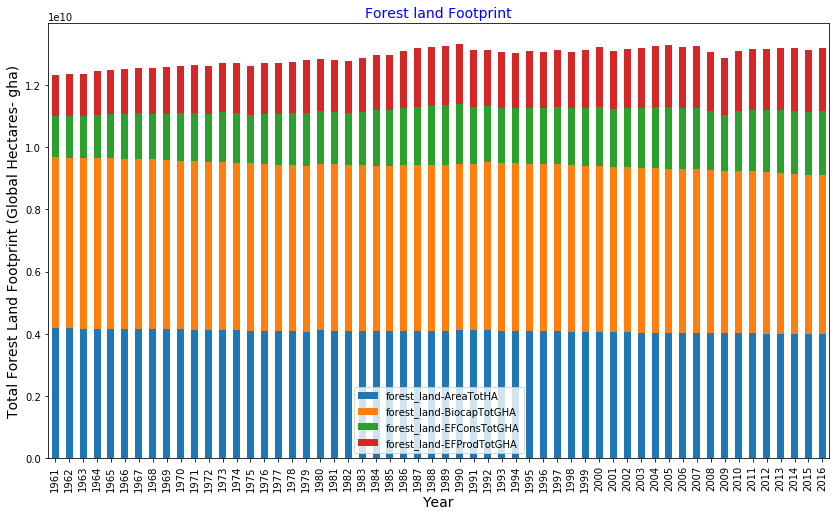

In [33]:
# Stacked bar chart of Forest land footprint by year
df_world.loc[:,['forest_land-AreaTotHA', 'forest_land-BiocapTotGHA', 'forest_land-EFConsTotGHA', 'forest_land-EFProdTotGHA']].plot.bar(stacked=True, figsize=(14,8))
plt.title('Forest land Footprint', fontsize=14, color='blue') 
plt.ylabel('Total Forest Land Footprint (Global Hectares- gha)', fontsize=14)
plt.xlabel('Year', fontsize=14)

The forest land footprint chart reveals a small decline in amount of forested land area and an increase in the amount of forestry used for production and consumption. In this case, consumption is local use while production is use for other countries. Alarmingly, the small decrease in area also comes with a larger decrease in biocapacity, resulting in a section of an ecosystem that can no longer support as many living organisms as it had previously. 

Text(0.5, 0, 'Year')

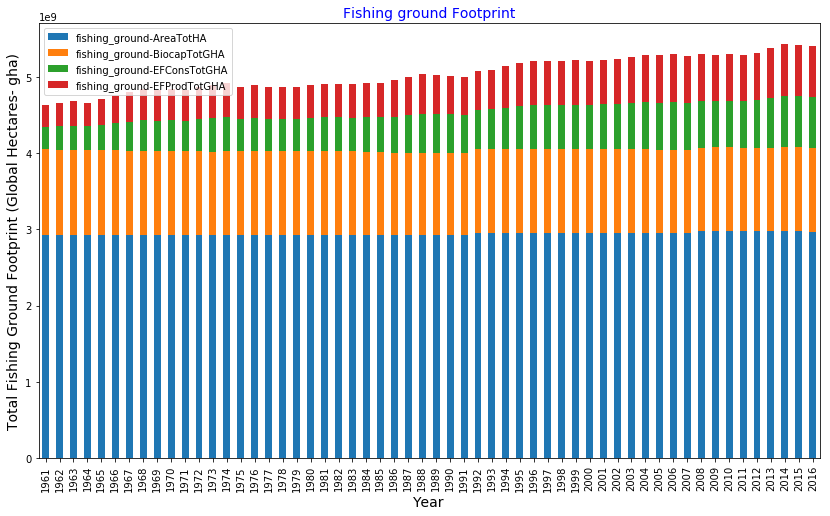

In [35]:
# stacked bar chart of fishing ground footprint by year
df_world.loc[:,['fishing_ground-AreaTotHA', 'fishing_ground-BiocapTotGHA', 'fishing_ground-EFConsTotGHA', 'fishing_ground-EFProdTotGHA']].plot.bar(stacked=True, figsize=(14,8))
plt.title('Fishing ground Footprint', fontsize=14, color='blue') 
plt.ylabel('Total Fishing Ground Footprint (Global Hectares- gha)', fontsize=14)
plt.xlabel('Year', fontsize=14)

The fishing ground footprint area has also remained roughly the same since 1961, as has the biocapacity of that area. However, production and consumption of fish has increased with the human population. 

Text(0.5, 0, 'Year')

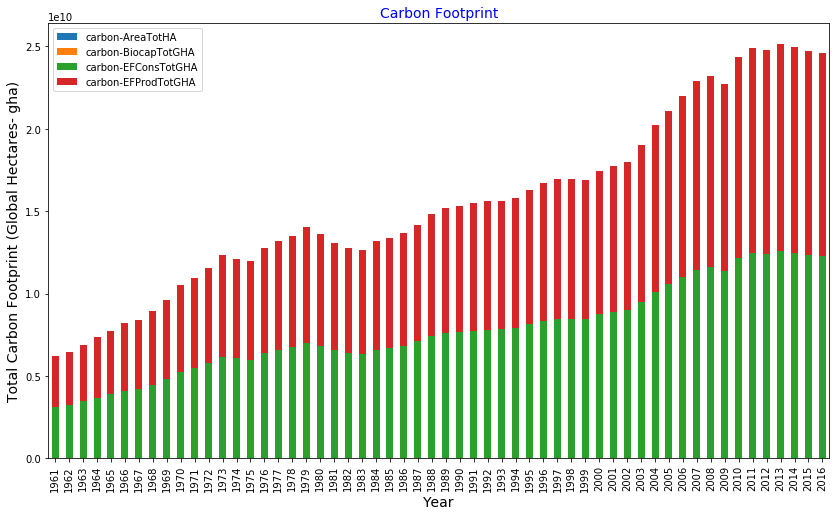

In [34]:
# Stacked bar chart of Carbon Footprint by year and source
df_world.loc[:,['carbon-AreaTotHA', 'carbon-BiocapTotGHA', 'carbon-EFConsTotGHA', 'carbon-EFProdTotGHA']].plot.bar(stacked=True, figsize=(14,8))
plt.title('Carbon Footprint', fontsize=14, color='blue')  
plt.ylabel('Total Carbon Footprint (Global Hectares- gha)', fontsize=14)
plt.xlabel('Year', fontsize=14)

The last world chart shows the world's carbon footprint and how it has grown since 1961. Breaking the footprint into it's components, production and consumption footprints, we see that the consumption has slightly outpace the production footprint. Additionally, we see that there was an increase in consumption rate starting in 2003 compared to the slower increase in years prior. 

### <font color='blue'><center>5b. Countries data analysis</center></font>

In [36]:
df_countries.head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
0,Afghanistan,1961,2,0.0449,411947.9980,0.0296,270905.1018,0.0296,270905.1018,0.0296,...,969.2636,812715.3054,423610.2433,0.0462,3.8170,1.6523,1.7861,0.2435,0.0001,0.0887
1,Afghanistan,1962,2,0.0449,419997.0093,0.0283,264670.5761,0.0283,264670.5761,0.0283,...,966.9715,794011.7283,563544.0002,0.0603,3.6724,1.5611,1.7248,0.2411,0.0001,0.0850
2,Afghanistan,1963,2,0.0449,428450.0122,0.0265,253013.3323,0.0265,253013.3323,0.0265,...,963.7433,759039.9969,613246.2482,0.0643,3.6407,1.4503,1.8041,0.2422,0.0001,0.0796
3,Afghanistan,1964,2,0.0449,437321.0144,0.0278,270692.6935,0.0278,270692.6935,0.0278,...,961.5439,812078.0805,734948.9609,0.0755,3.6906,1.5058,1.7710,0.2548,0.0001,0.0834
4,Afghanistan,1965,2,0.0449,446626.0071,0.0289,286849.9286,0.0289,286849.9286,0.0289,...,958.2054,860549.7858,855987.5845,0.0861,3.7420,1.5332,1.7775,0.2585,0.0001,0.0866


The first step in analyzing the dataset for the countries is to identify outliers within the dataset. This was first done for the most recent year in the data (2016) to assess individual country outliers, then on the data set as a whole. 

In [37]:
# Create 2016 countries data set
df_countries2016 = df_countries[df_countries['year'] == 2016]
df_countries2016.head()

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
55,Afghanistan,2016,2,0.0449,1557420.0440,0.0392,1356853.5270,0.0392,1356853.5270,0.0392,...,8091.9794,4070560.5810,8585153.3170,0.2477,1.7194,0.7012,0.5179,0.1349,0.0002,0.1175
111,Albania,2016,3,0.0250,73269.5721,0.0391,114562.7909,0.0391,114562.7909,0.0391,...,381035.8507,343688.3727,4063912.8600,1.3887,4.4143,1.3766,0.6703,0.7310,0.1302,0.1174
167,Algeria,2016,4,0.0300,1217520.0200,0.0292,1187523.7510,0.0292,1187523.7510,0.0292,...,1230570.2013,3562571.2530,103518590.7700,2.5493,4.5409,1.0324,0.5679,0.2732,0.0303,0.0877
223,Angola,2016,7,0.0372,1070810.0590,0.0464,1337520.8570,0.0464,1337520.8570,0.0464,...,11142686.7980,4012562.5710,17496905.7190,0.6072,3.7299,0.7673,1.1970,0.6325,0.3867,0.1393
316,Argentina,2016,9,0.0338,1481400.0240,0.1153,5056433.7860,0.1153,5056433.7860,0.1153,...,81130856.5000,15169301.3580,121340897.6100,2.7673,15.9680,6.5059,3.4280,1.0705,1.8503,0.3460


Text(0.5, 1.08, '2016 Outliers for Carbon, Built Land, and Ecological Footprint')

<Figure size 432x288 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

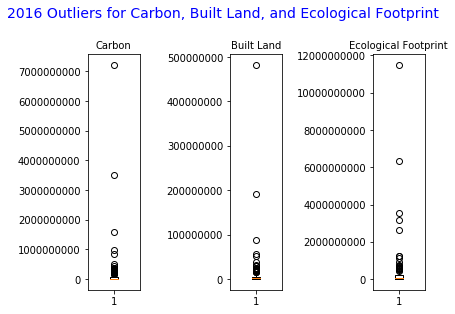

In [84]:
#Search for outliers in 2016
fig = plt.figure()
plt.figure(figsize=(14,8))
fig, ax = plt.subplots(1, 5)

plt.subplot(1, 3, 1)
plt.boxplot(df_countries2016['total-carbon'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Carbon', fontsize=10)

plt.subplot(1, 3, 2)
plt.boxplot(df_countries2016['total-built_up_land'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Built Land', fontsize=10)

plt.subplot(1, 3, 3)
plt.boxplot(df_countries2016['total-EF']) 
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Ecological Footprint', fontsize=10)

plt.tight_layout()

fig.suptitle('2016 Outliers for Carbon, Built Land, and Ecological Footprint', fontsize=14, color='blue', y=1.08)

As  we see from the boxplots above, the average carbon footprint, built land footprint, and ecological footprint are all very low (median is indicated by the red line). The are very clearly outliers above even the third quartile, with three outliers having extreme footprints. 

In [39]:
# Statistics for outlier data
df_countries2016.describe()

,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,built_up_land-EFProdTotGHA,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
count,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,...,160.0000,160.0000,160.0000,159.0000,159.0000,159.0000,159.0000,159.0000,159.0000,159.0000
mean,2016.0000,129.5188,0.0352,1205820.6252,0.0686,3337367.8486,0.0686,3337367.8486,0.0686,3337367.8486,...,15386665.5102,10012103.5457,145102261.4694,3.2166,10.1762,1.5614,0.9151,3.4176,0.8583,0.2072
std,0.0000,78.0297,0.0163,3333566.4018,0.0493,13913503.6189,0.0493,13913503.6189,0.0493,13913503.6189,...,39737368.1576,41740510.8568,649866376.2345,3.7543,12.9073,1.2233,1.7499,10.4368,1.8236,0.1475
min,2016.0000,1.0000,0.0003,120.1840,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,8091.9794,0.0000,204060.8329,0.0485,1.4795,0.1867,0.0054,0.0609,0.0002,0.0017
25%,2016.0000,65.2500,0.0261,140710.7468,0.0383,183611.8776,0.0383,183611.8776,0.0383,183611.8776,...,655019.7611,550835.6329,3465498.9224,0.4911,3.7468,0.7596,0.2516,0.4395,0.0793,0.1158
50%,2016.0000,122.5000,0.0323,405212.9975,0.0573,733328.8270,0.0573,733328.8270,0.0573,733328.8270,...,2782463.1748,2199986.4808,15789598.8380,1.9637,7.1358,1.2080,0.4581,0.8701,0.2380,0.1720
75%,2016.0000,197.2500,0.0424,1063789.9780,0.0820,1917976.1235,0.0820,1917976.1235,0.0820,1917976.1235,...,10172297.3040,5753928.3705,64292460.3225,4.6868,11.7312,1.9182,0.8745,2.3193,0.5823,0.2468
max,2016.0000,351.0000,0.1308,31691300.7800,0.2955,160538830.6000,0.2955,160538830.6000,0.2955,160538830.6000,...,279529185.6100,481616491.8000,7206757941.0000,25.3086,101.0798,6.6588,18.0577,83.4403,14.5661,0.8866


From the printout above, we see that the median carbon footprint for a country in 2016 was 15789598.8380 global hectares of carbon, or approximately 1.9637 global hectares of carbon per person, per year. However, the country with the most extreme values, China, had a carbon output of 7206757941.00 hectares, or approximately 25.3086 global hectares per person- an increase of 12.88 times the carbon footprint of the median value. 

A look into the top ten countries provided a glimpse into the outliers for these footprints below: 

In [58]:
# Sort 2016 data set for top 10 outliers
df_countries2016.sort_values(by=['total-carbon', 'total-EF'], ascending=False).head(10)

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
1783,China,2016,351,0.0221,31691300.7800,0.1119,160538830.6000,0.1119,160538830.6000,0.1119,...,279529185.6100,481616491.8000,7206757941.0000,5.0222,7.9992,1.5532,0.3447,0.5487,0.1948,0.3356
8578,United States of America,2016,231,0.0272,8761080.0780,0.0907,29215883.2200,0.0907,29215883.2200,0.0907,...,179490370.2600,87647649.6600,3497595686.0000,10.8560,19.6979,3.8969,0.8768,3.2389,0.5571,0.2720
3955,India,2016,100,0.0187,24802199.2200,0.0479,63470660.5800,0.0479,63470660.5800,0.0479,...,91735292.7100,190411981.7400,1594351008.6000,1.2040,2.6885,0.9952,0.0150,0.2612,0.0693,0.1438
6804,Russian Federation,2016,185,0.0334,4810729.9800,0.0418,6014960.1840,0.0418,6014960.1840,0.0418,...,239715090.5200,18044880.5520,993780484.1000,6.9029,18.1844,3.0429,0.4600,5.9881,1.6651,0.1253
4376,Japan,2016,110,0.0193,2470149.9020,0.0542,6930153.6600,0.0542,6930153.6600,0.0542,...,71200215.5700,20790460.9800,847286441.3000,6.6324,8.7552,0.5772,0.1122,0.7133,0.5573,0.1627
3327,Germany,2016,79,0.0369,3020124.8740,0.1328,10878955.9000,0.1328,10878955.9000,0.1328,...,12221919.3500,32636867.7000,520499505.0000,6.3542,10.9267,2.1256,0.3132,1.5862,0.1492,0.3984
4625,"Korea, Republic of",2016,117,0.0148,749236.0229,0.0588,2987266.0920,0.0588,2987266.0920,0.0588,...,61236417.5700,8961798.2760,439036351.9000,8.6438,11.5193,0.9514,0.1716,0.3704,1.2056,0.1764
4067,"Iran, Islamic Republic of",2016,102,0.0415,3334580.0780,0.0700,5617958.8500,0.0700,5617958.8500,0.0700,...,39092830.3900,16853876.5500,390092502.7000,4.8593,7.1358,1.2080,0.2347,0.1369,0.4870,0.2099
1538,Canada,2016,33,0.0292,1061449.9510,0.0695,2523558.4810,0.0695,2523558.4810,0.0695,...,131710769.9980,7570675.4430,372861498.5000,10.2746,34.4947,6.6588,0.8073,12.9161,3.6294,0.2086
7120,Saudi Arabia,2016,194,0.0548,1767329.9560,0.0348,1124531.4590,0.0348,1124531.4590,0.0348,...,8434058.8979,3373594.3770,366867654.5000,11.3667,13.0880,0.7672,0.3408,0.2474,0.2613,0.1045


Looking at the results above for carbon footprint, it's easy to see why it was important to separate out one year of data; because the top three outliers are so far above the other countries, a list of the top 10 carbon footprints from the full data set would yield the same 3 countries over and over. Looking at the total carbon footprint from these top 10 countries reveals that the top carbon emissions come from China at a rate of more than double the emissions from the second highest country, the United States. However, the carbon footprint totals do not tell the entire story. Once population is factored into the total (resulting column is total carbon per capita), we see that the United States has the highest carbon emissions per capita at 10.8560 global hectares per person while Chine has less than half that at 5.0222 global hectares per person. Comparitively, India, which has the third highest carbon footprint has the _lowest_ carbon footprint per capita of the top ten outliers at just 1.2040 global hectares per person. 

The next step in the analysis of the country data was to chart the total carbon emissions by country (below). 

Text(0.5, 1.0, 'Total Carbon Emissions by Country in 2016')

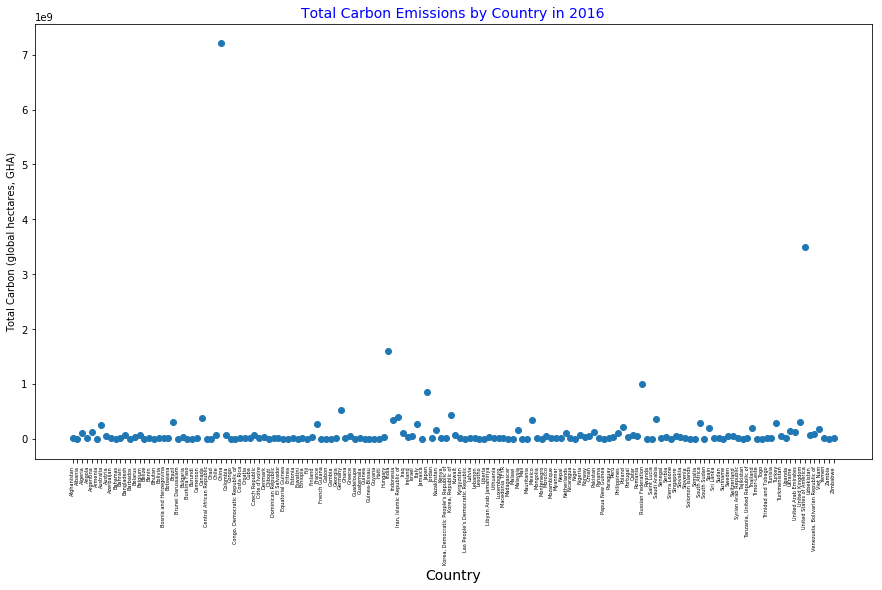

In [59]:
# Scatterplot of Total carbon vs. Country for 2016
plt.figure(figsize=(15,8))
plt.scatter(x='country', y='total-carbon', data=df_countries2016)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation='vertical', fontsize=5)
plt.ylabel('Total Carbon (global hectares, GHA)')
plt.title('Total Carbon Emissions by Country in 2016', fontsize=14, color='blue')

Looking at the chart above, we again see that there are a handful of outliers while the majority of countries in the world have very low total carbon emissions. Given this, we might expect to see the same in the per capita graph of total carbon below. 

Text(0.5, 1.0, 'Total Carbon Emissions per Capita by Country in 2016')

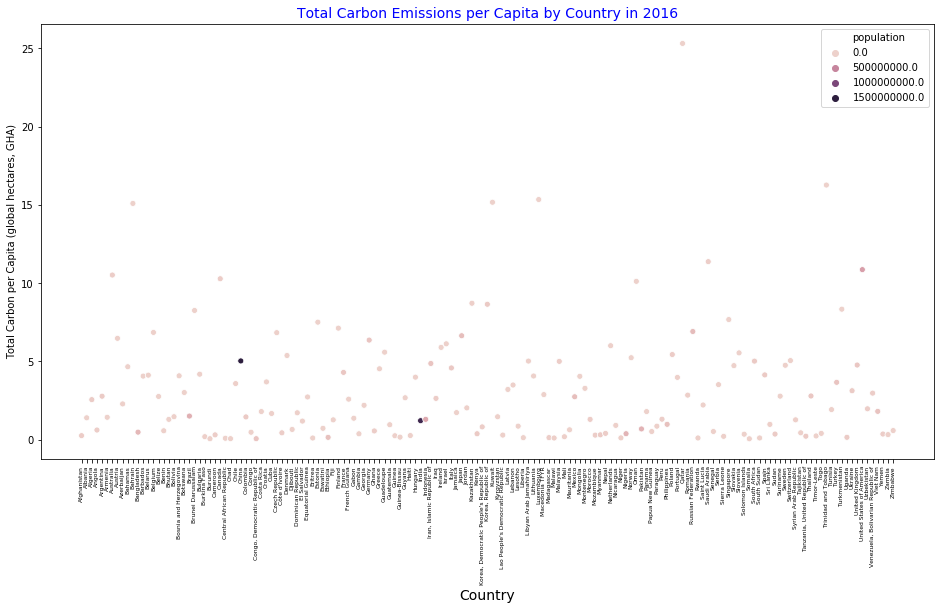

In [78]:
# Scatterplot of Total Carbon per Capita vs. Country for 2016
plt.figure(figsize=(16,8))
sns.scatterplot(x='country', y='total-carbon_perCap', hue='population', data=df_countries2016)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation='vertical', fontsize=6)
plt.ylabel('Total Carbon per Capita (global hectares, GHA)')
plt.title('Total Carbon Emissions per Capita by Country in 2016', fontsize=14, color='blue')

Looking at the chart above, we see that the two countries with the largest populations- China and India- have significantly lower carbon footprints per person than countries that have much smaller populations. The chart below shows the 10 countries with the highest carbon output per capita. 

In [65]:
# Sort 2016 data set for top 10 outliers
df_countries2016.sort_values(by=['total-carbon_perCap'], ascending=False).head(10)

,country,year,country_code,built_up_land-AreaPerCap,built_up_land-AreaTotHA,built_up_land-BiocapPerCap,built_up_land-BiocapTotGHA,built_up_land-EFConsPerCap,built_up_land-EFConsTotGHA,built_up_land-EFProdPerCap,...,total-fishing_ground,total-built_up_land,total-carbon,total-carbon_perCap,total-EF_perCap,total-crop_land_perCap,total-grazing_land_perCap,total-forest_land_perCap,total-fishing_ground_perCap,total-built_up_land_perCap
6723,Qatar,2016,179,0.0422,108472.9996,0.0461,118584.2115,0.0461,118584.2115,0.0461,...,3066943.7777,355752.6345,65038037.9400,25.3086,27.7548,0.6070,0.3551,0.1522,1.1935,0.1384
8180,Trinidad and Tobago,2016,220,0.0009,1291.7800,0.0012,1668.7126,0.0012,1668.7126,0.0012,...,2078826.7341,5006.1377,22195529.5600,16.2609,19.0506,0.5165,0.2039,0.5426,1.5230,0.0037
5029,Luxembourg,2016,256,0.0518,29838.9108,0.0817,47037.3901,0.0817,47037.3901,0.0817,...,85565.0100,141112.1703,8829735.2260,15.3361,20.3240,1.4655,0.7761,2.3526,0.1486,0.2451
4643,Kuwait,2016,118,0.0283,114616.9968,0.2501,1013683.8160,0.2501,1013683.8160,0.2501,...,1549621.4812,3041051.4480,61445108.1700,15.1620,17.4968,0.7058,0.3209,0.1753,0.3824,0.7504
588,Bahrain,2016,13,0.0296,42243.9003,0.0785,111923.9712,0.0785,111923.9712,0.0785,...,770559.5167,335771.9136,21500109.0200,15.0860,17.0827,0.5833,0.3432,0.2939,0.5407,0.2356
7120,Saudi Arabia,2016,194,0.0548,1767329.9560,0.0348,1124531.4590,0.0348,1124531.4590,0.0348,...,8434058.8979,3373594.3770,366867654.5000,11.3667,13.0880,0.7672,0.3408,0.2474,0.2613,0.1045
8578,United States of America,2016,231,0.0272,8761080.0780,0.0907,29215883.2200,0.0907,29215883.2200,0.0907,...,179490370.2600,87647649.6600,3497595686.0000,10.8560,19.6979,3.8969,0.8768,3.2389,0.5571,0.2720
428,Australia,2016,10,0.0266,642822.0215,0.0589,1422135.1640,0.0589,1422135.1640,0.0589,...,77956868.1130,4266405.4920,253589760.5000,10.5111,30.1900,4.8098,7.6827,3.7783,3.2313,0.1768
1538,Canada,2016,33,0.0292,1061449.9510,0.0695,2523558.4810,0.0695,2523558.4810,0.0695,...,131710769.9980,7570675.4430,372861498.5000,10.2746,34.4947,6.6588,0.8073,12.9161,3.6294,0.2086
6238,Oman,2016,221,0.0423,187292.0074,0.1872,828209.6882,0.1872,828209.6882,0.1872,...,10154727.4950,2484629.0646,44729136.0500,10.1088,14.5683,1.0929,0.3704,0.1396,2.2950,0.5615


It is perhaps unsurprising that the ten countries with the highest carbon emissions per capita also tend to be countries with a large amount of individual wealth in the population. 

After looking at 2016, the total carbon emissions was charted for the full data set. 


Text(0.5, 1.0, 'Total Carbon Emissions by Country since 1961')

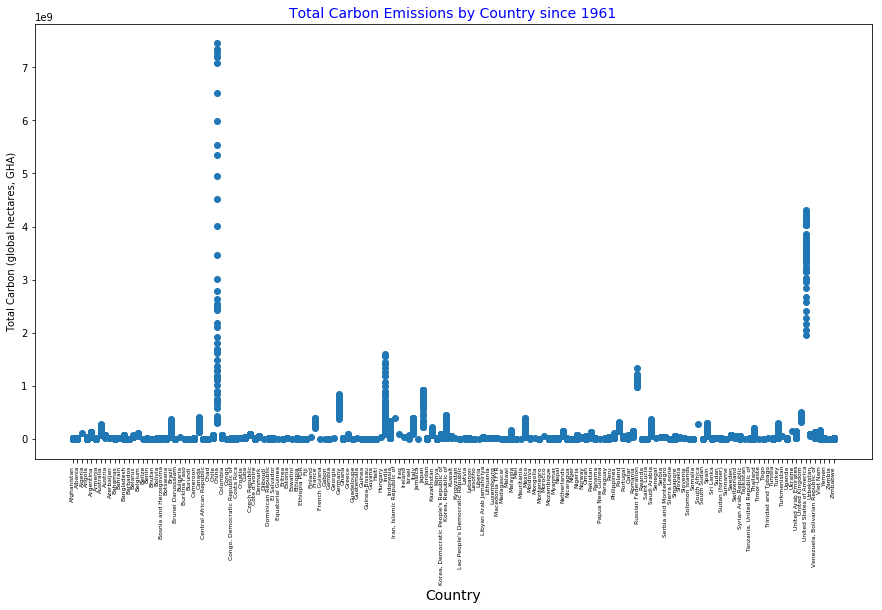

In [67]:
# Total Carbon Emissions by Country vs. Country
plt.figure(figsize=(15,8))
plt.scatter(x='country', y='total-carbon', data=df_countries)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation='vertical', fontsize=6)
plt.ylabel('Total Carbon (global hectares, GHA)')
plt.title('Total Carbon Emissions by Country since 1961', fontsize=14, color='blue')

In the chart above, we see that the outliers have consistently been outliers since the establishment of their country (if occurred during the period of this dataset) or have been outliers since the beginning of the data collection (1961). There are large gaps in some of the data, such as the data for China, where the amount of total carbon emissions significantly increased from the prior year. Other gaps in the data are a result of missing data/no data for that country for that year. 

The last step in analyzing the 2016 data was to use the total columns for each footprint category to create pairplots showing the correlation between each set of variables. 

In [69]:
# Create data set with just total columns for pair plot analysis
df_countries2016_2 = df_countries2016[['country', 'country_code', 'population', 'total-carbon', 'total-EF', 'total-built_up_land', 'total-crop_land', 'total-grazing_land', 'total-forest_land', 'total-fishing_ground']]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


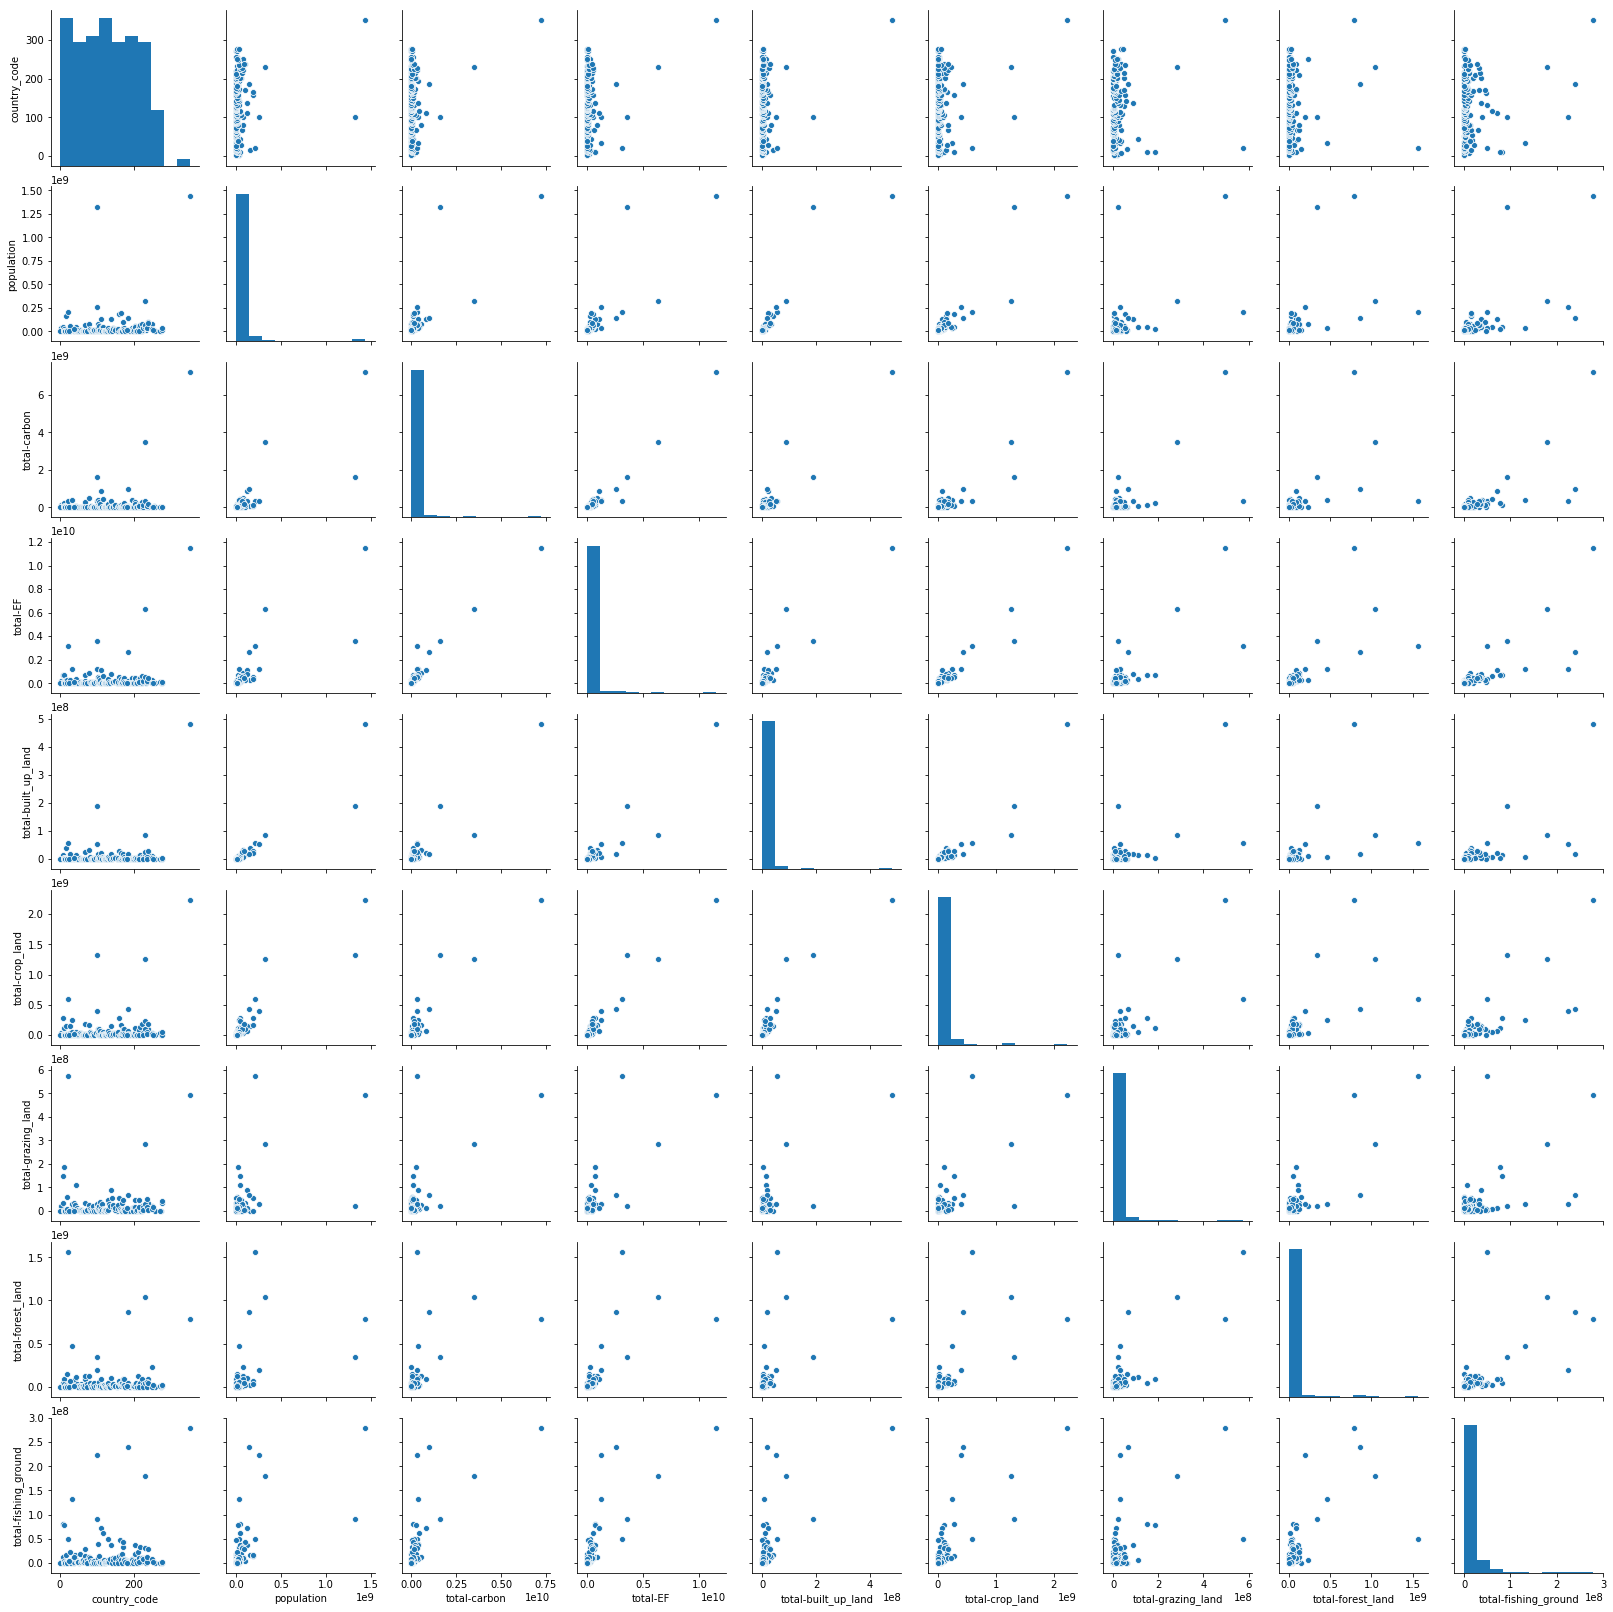

In [70]:
# Pairplot for 2016 country data
sns.pairplot(df_countries2016_2)

From the above pair plots, we see that there were strong, positive correlations between total ecological footprint and total carbon footprint, total crop land fooprint and total ecological footprint, population and built up land, and total built up land and total ecological footprint. For every footprint type, there was a positive correlation with total ecological footprint, which makes sense as total ecological footprint is a sum of each footprint type. 

The next step was to run a pair plot for the same columns that included all of the country data set. 

In [55]:
# Country data set selected for total footprint columns, year, and population
df_countries_tot = df_countries[['country', 'year', 'population', 'total-carbon', 'total-EF', 'total-built_up_land', 'total-crop_land', 'total-grazing_land', 'total-forest_land', 'total-fishing_ground']]

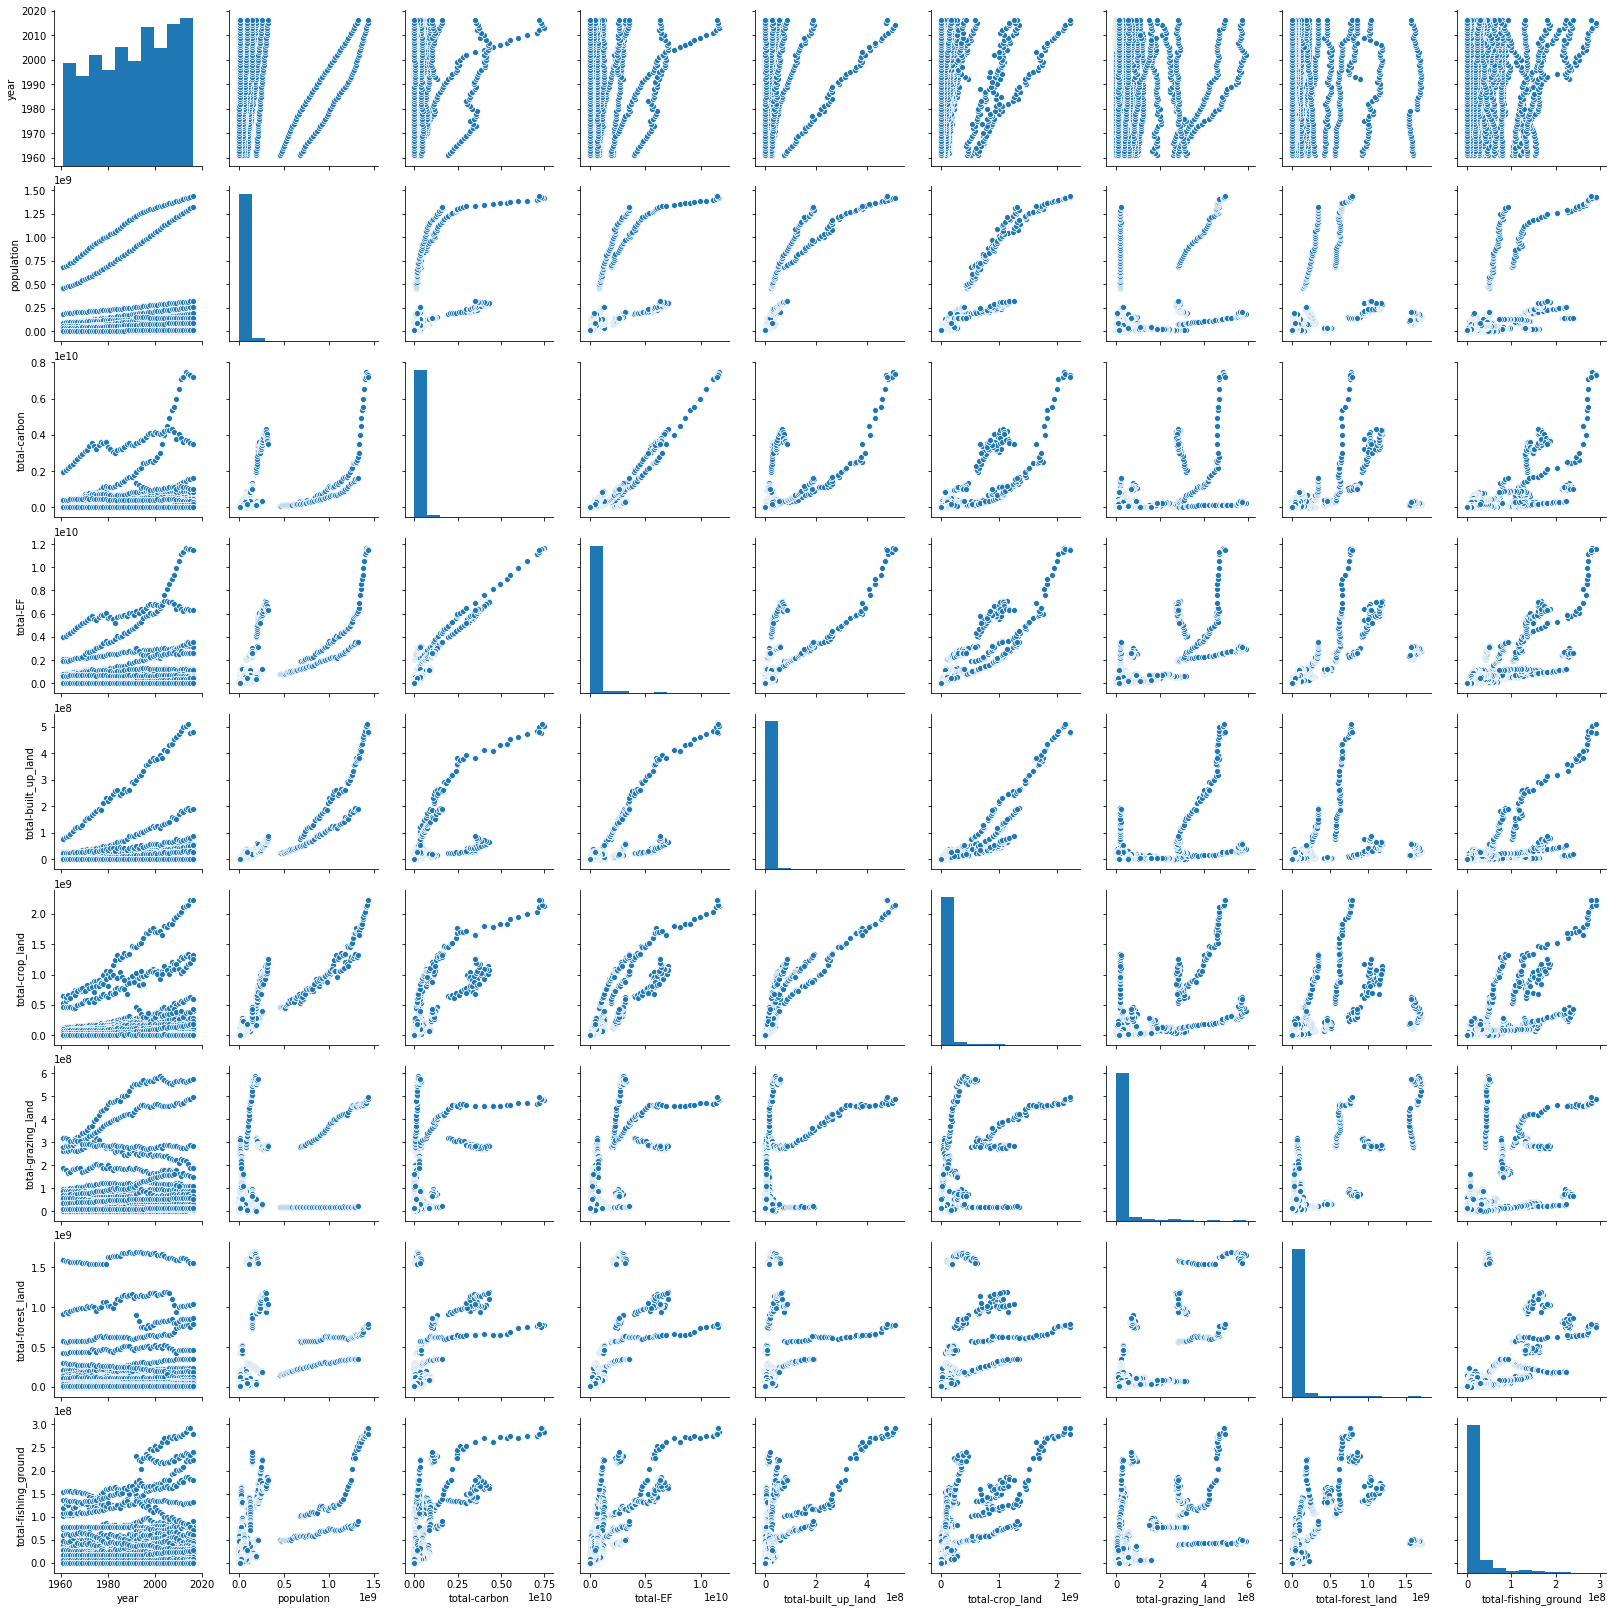

In [71]:
# Pair plots for df_countries_tot
sns.pairplot(df_countries_tot)

Looking at the pair plots above, we see there is a very strong positive correlation between total Ecological Footprint and total carbon footprint as well as between total crop land and total built up land. Interestingly, we see that the relationships between population and the footprints are not linear but rather taper off after quickly increasing; this same type of correlation pattern is found between total carbon and built up land, total carbon and crop land, and across all variables interacting with total grazing land. 